In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
df = pd.read_csv('adult_train.csv')
print (df)

Matplotlib is building the font cache; this may take a moment.


       Age          Workclass  fnlwgt    Education  Education_Num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Martial_Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [11]:
print(df.columns)

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')


In [83]:
print(df.describe)

<bound method NDFrame.describe of        Age          Workclass  fnlwgt      Education       Martial_Status  \
23178   47   Self-emp-not-inc  126500        7th-8th   Married-civ-spouse   
26946   50            Private  129956        HS-grad   Married-civ-spouse   
17656   38            Private  209609   Some-college   Married-civ-spouse   
14387   24        Federal-gov  127185     Assoc-acdm   Married-civ-spouse   
21999   25            Private   69847      Bachelors        Never-married   
...    ...                ...     ...            ...                  ...   
13477   34            Private  168768     Assoc-acdm        Never-married   
8712    40            Private  187164        HS-grad   Married-civ-spouse   
10054   35            Private  346766        HS-grad        Never-married   
7081    46            Private  169042           10th        Never-married   
3008    26            Private   96130        HS-grad        Never-married   

               Occupation     Relationshi

In [20]:
%matplotlib inline

[[<AxesSubplot:title={'center':'Age'}>
  <AxesSubplot:title={'center':'fnlwgt'}>]
 [<AxesSubplot:title={'center':'Education_Num'}>
  <AxesSubplot:title={'center':'Capital_Gain'}>]
 [<AxesSubplot:title={'center':'Capital_Loss'}>
  <AxesSubplot:title={'center':'Hours_per_week'}>]]


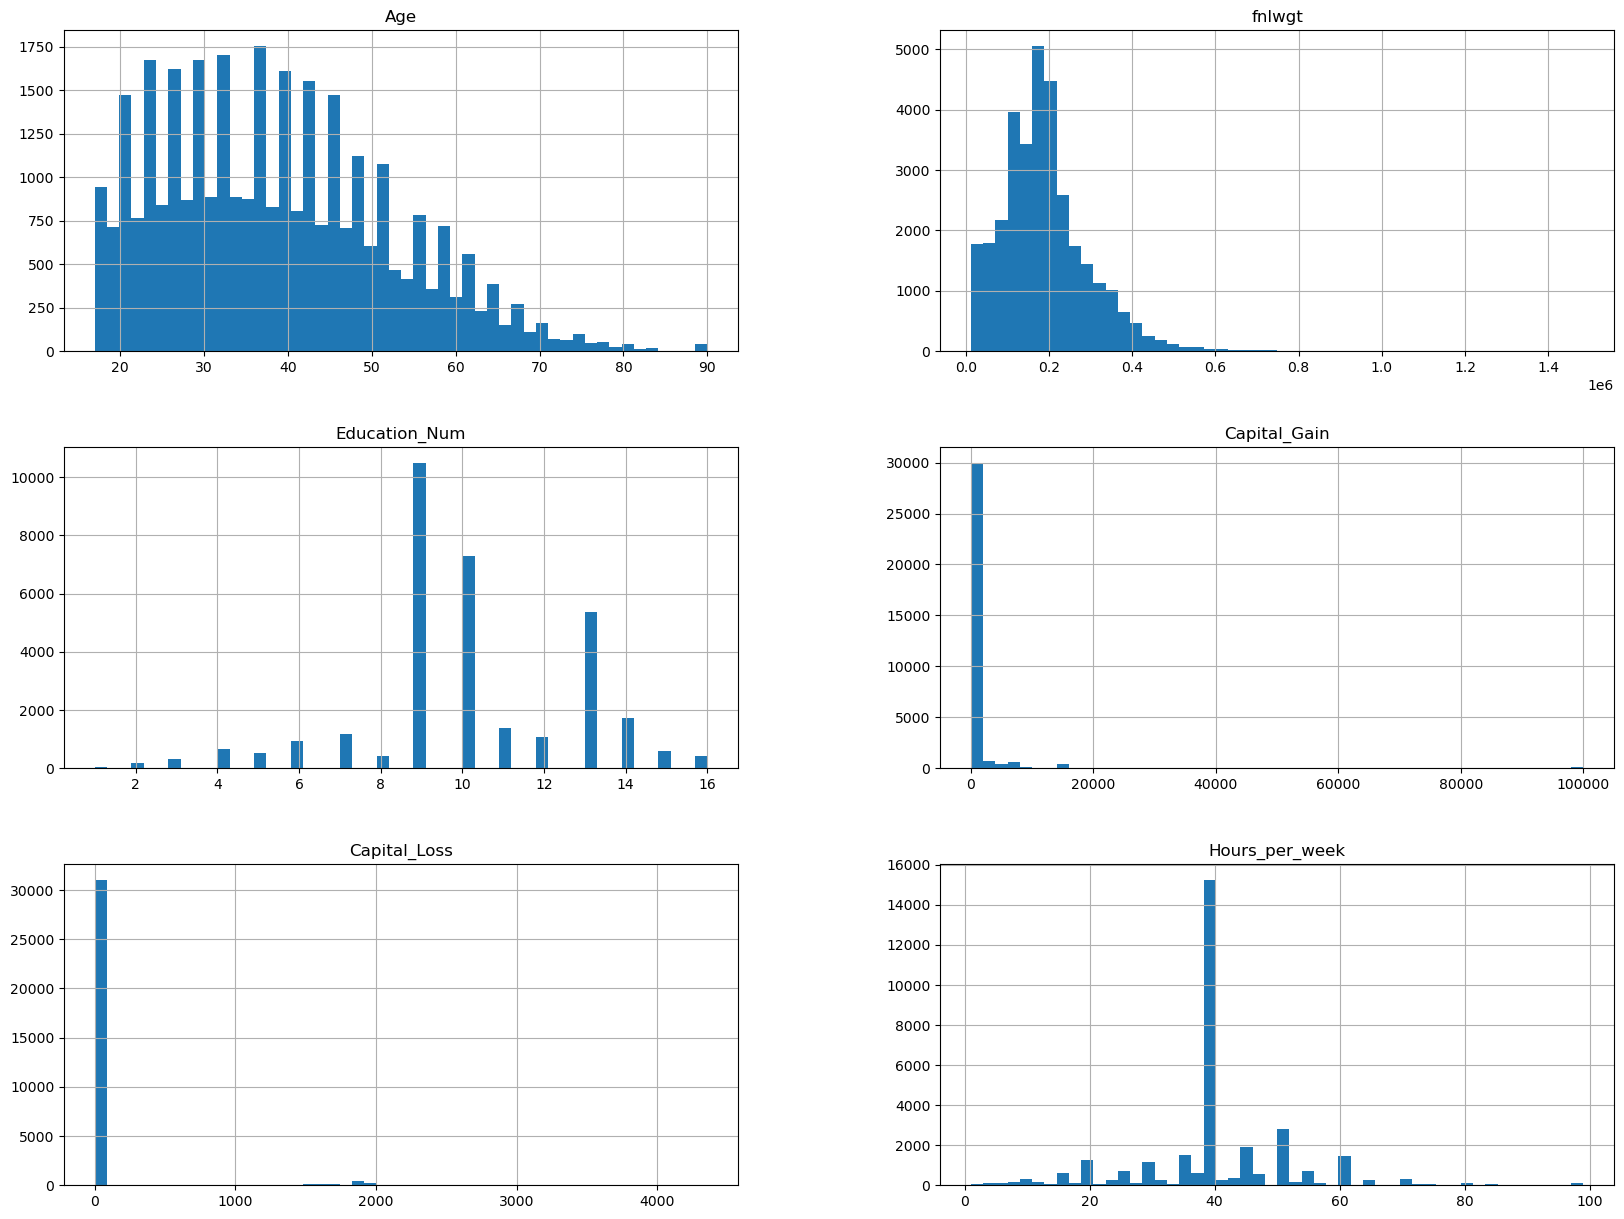

In [25]:
print(df.hist(bins=50,figsize=(20,15)))
plt.show();

In [62]:

def split_train_test(df,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(df))
    test_set_size = int(test_ratio * len(df))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return df.iloc[train_indices],df.iloc[test_indices]

train_set,test_set = split_train_test(df,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 26049
Test set length: 6512


In [63]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(df,test_ratio,id_column):
    ids = df[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return df.loc[~in_test_set],df.loc[in_test_set]

In [64]:
df_with_id = df.reset_index()
train_set,test_set = split_train_test_by_id(df_with_id,0.2,"index")

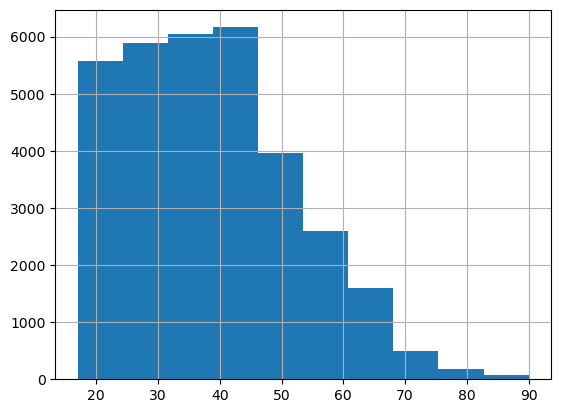

In [68]:
df['Age'].hist();

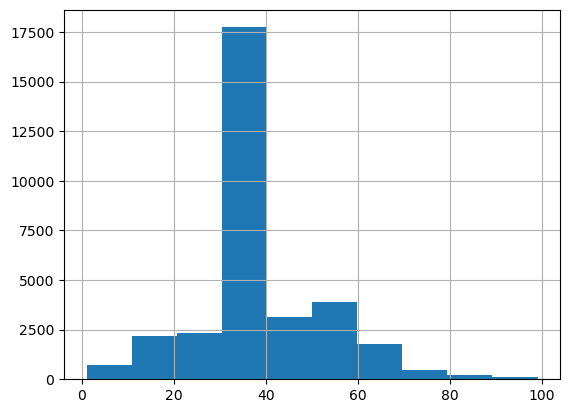

In [69]:
df['Hours_per_week'].hist();

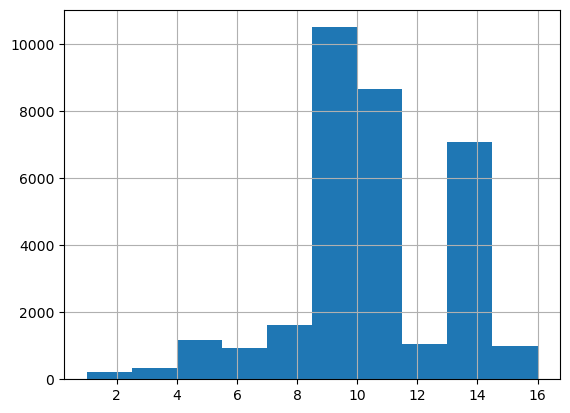

In [73]:
df['Education_Num'].hist();

In [78]:
from sklearn.model_selection import StratifiedShuffleSplit
# или train_test_split с параметром stratify
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(df,df['Education_Num']):
    print(train_index)
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

[23178 26946 17656 ... 10054  7081  3008]


In [79]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("Education_Num",axis=1,inplace=True)

In [80]:
df = strat_train_set.copy()

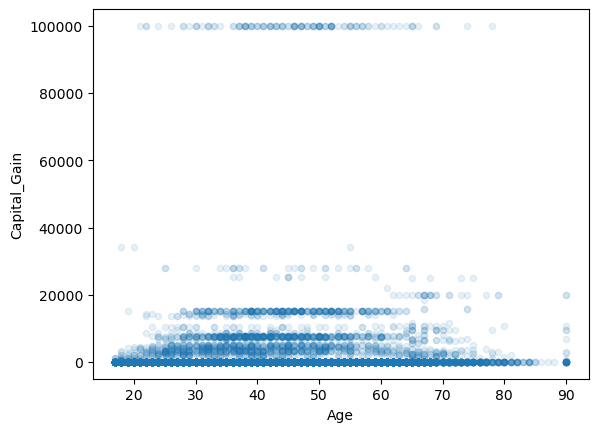

In [90]:
#диаграмма рассеяния
df.plot(kind='scatter',x='Age',y = 'Capital_Gain',alpha = 0.1);

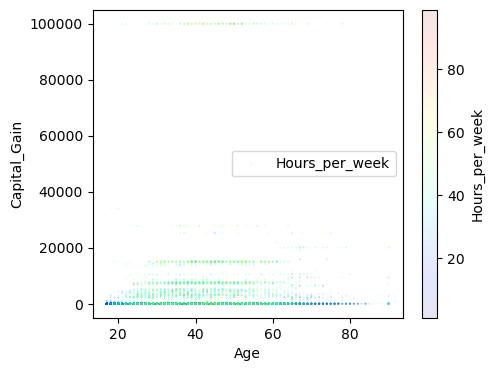

In [108]:
df.plot(kind='scatter',x='Age',y = 'Capital_Gain',alpha = 0.1,s=df['Hours_per_week']/100,label='Hours_per_week',figsize=(5,4),c='Hours_per_week',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [92]:
import seaborn as sns

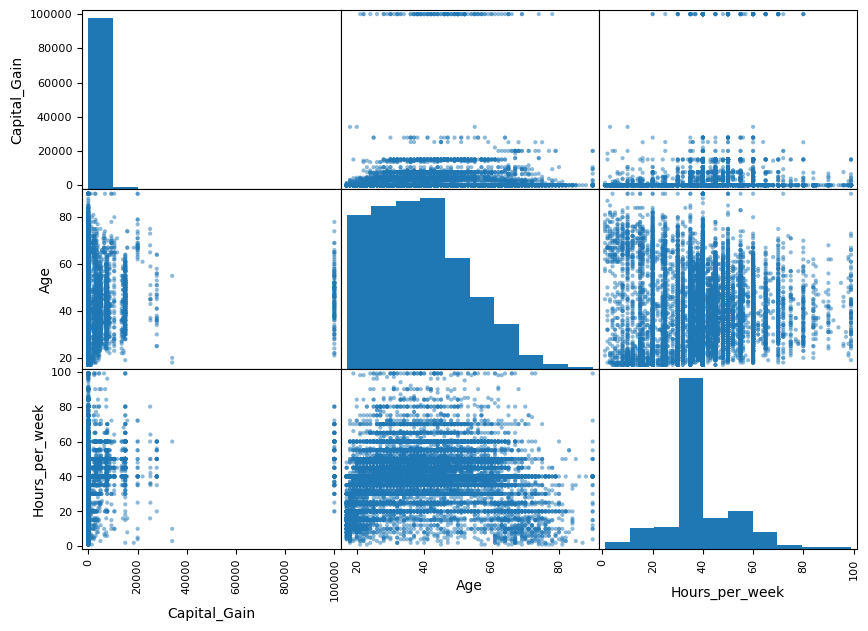

In [110]:
from pandas.plotting import scatter_matrix

attributes = ['Capital_Gain','Age','Hours_per_week']
scatter_matrix(df[attributes],figsize=(10,7));

<AxesSubplot:xlabel='Capital_Gain', ylabel='Hours_per_week'>

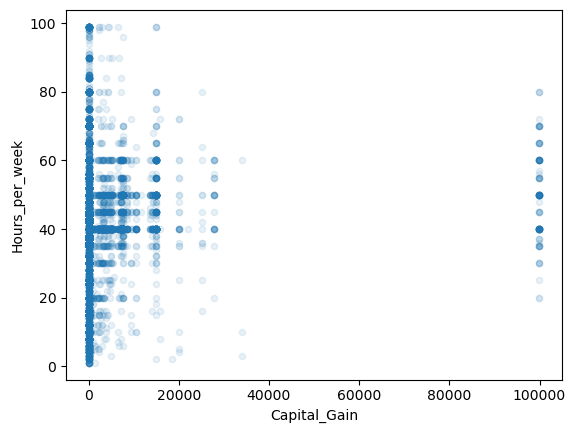

In [113]:
df.plot(kind='scatter',x='Capital_Gain',y='Hours_per_week',alpha=0.1)

In [117]:
corr_matrix = df.corr()
corr_matrix['Hours_per_week'].sort_values(ascending=False)

Hours_per_week    1.000000
Capital_Gain      0.076387
Age               0.064433
Capital_Loss      0.056463
fnlwgt           -0.018978
Name: Hours_per_week, dtype: float64

In [126]:
# убрать объекты выборки с пропусками
df.dropna(subset=['Capital_Gain'])
# убрать признак
df.drop('Capital_Gain',axis = 1)
# замена медианой
median = df['Capital_Gain'].median()
df.Capital_Gain.fillna(median,inplace=True)

In [127]:
df_category = df[['Country']]
df_category

,Country
23178,Puerto-Rico
26946,United-States
17656,United-States
14387,United-States
21999,United-States
...,...
13477,United-States
8712,United-States
10054,United-States
7081,Ecuador


In [128]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [139]:
category_encoded = ordinal_encoder.fit_transform(df_category)
category_encoded[:10]

array([[31.],
       [37.],
       [37.],
       [37.],
       [37.],
       [37.],
       [37.],
       [37.],
       [37.],
       [37.]])

In [140]:
ordinal_encoder.categories_

[array([' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
        ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
        ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
        ' Honduras', ' Hong', ' Hungary', ' India', ' Iran', ' Ireland',
        ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua',
        ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines', ' Poland',
        ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan',
        ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam',
        ' Yugoslavia', nan], dtype=object)]

In [141]:
from sklearn.preprocessing import OneHotEncoder
onehotEnconder = OneHotEncoder()
df_category_one_hot = onehotEnconder.fit_transform(df_category)
df_category_one_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])